# Gráficos
del rendimiento del sistema. Estos son útiles para comparar tiempos de ejecución entre programas de distinto lenguaje y grado de paralelización

In [54]:
#Cargo librerías
import numpy as np
import matplotlib.pyplot as plt

#Agrego interactividad a los gráficos
%matplotlib ipympl

In [55]:
#Cargo datos.
name = ["py_cpu", "py_gpu", "cpp_cpu", "cpp_gpu_v1", "cpp_gpu_v2"]
name_files = [name[i] + "_t_computo.txt" for i in range(len(name))]

# "py_gpu_t_computo.txt", "cpp_gpu_v1_t_computo.txt", , "cpp_gpu_v2_t_computo.txt", , "cpp_cpu_t_computo.txt"
# datos = 
datos = [np.loadtxt("resultados/" + name_files[i]) for i in range(len(name_files))]


ValueError: the number of columns changed from 101 to 11 at row 11; use `usecols` to select a subset and avoid this error

In [ ]:

N_array = np.empty([len(datos), len(datos[-1])])
t_computo_mean = np.empty([len(datos), len(datos[-1])])
t_computo_std = np.empty([len(datos), len(datos[-1])])

for i, dato in enumerate(datos):
    if len(dato) < len(datos[-1]):
        #Cargo algunos datos en N_array y el resto los asigno a cero
        print(f"{name[i]} llega a {len(dato)} cuando debería tener {len(datos[-1])}")
        N_array[i] = np.concatenate((dato[:,0], np.zeros(len(datos[-1])-len(dato))))
        t_computo = dato[:,3:] #Elimino tiempo de precalentamiento "warm-up"
        t_computo = np.concatenate((t_computo, np.zeros([len(datos[-1])-len(dato), len(t_computo[0])])), axis=0)
    else:
        N_array[i] = dato[:,0]
        t_computo = dato[:,3:] #Elimino tiempo de precalentamiento "warm-up"

    t_computo_mean[i] = np.mean(t_computo, axis=1)
    t_computo_std[i] = np.std(t_computo, axis=1)

    

py_cpu llega a 10 cuando debería tener 13
py_gpu llega a 12 cuando debería tener 13
cpp_cpu llega a 11 cuando debería tener 13


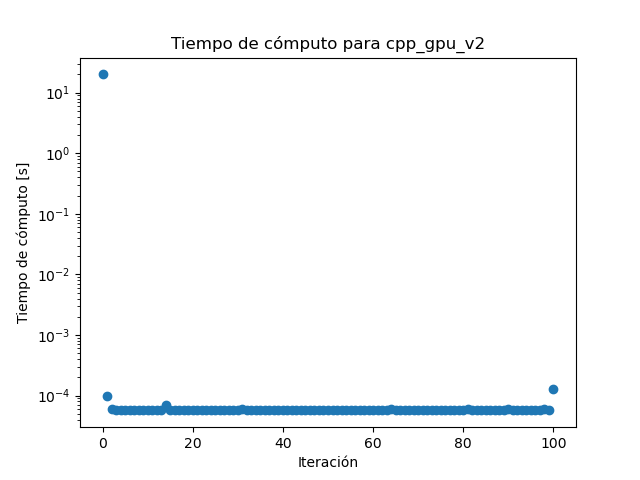

In [ ]:
#Grafico t_computo para cpp_gpu_v2
fig, ax = plt.subplots()
N_index = 3
ax.plot(datos[4][N_index], "o")
ax.set_xlabel("Iteración")
ax.set_ylabel("Tiempo de cómputo [s]")
ax.set_title("Tiempo de cómputo para cpp_gpu_v2")
ax.set_yscale("log")


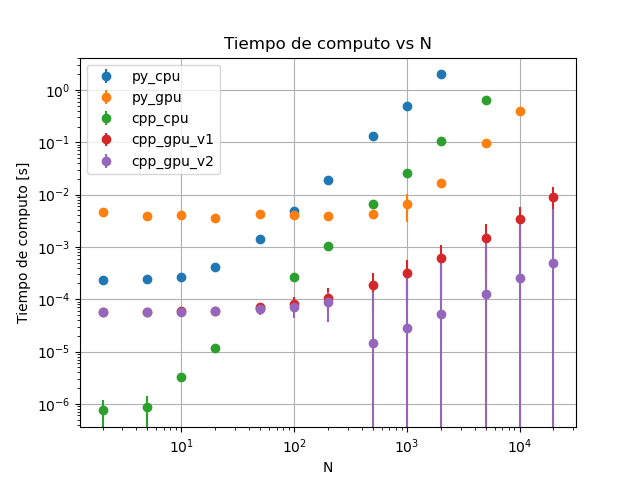

In [ ]:
#Grafico t_computo_mean vs N
fig, ax = plt.subplots()

for i in range(len(datos)):
    ax.errorbar(N_array[i], t_computo_mean[i], yerr=t_computo_std[i], fmt="o", label = name[i])

ax.set_xlabel("N")
ax.set_ylabel("Tiempo de computo [s]")
ax.set_title("Tiempo de computo vs N")
ax.legend()
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()


## Speed-up

In [ ]:
def sigma_cociente(a, b, sigma_a,sigma_b):
    '''
    Error en la determinación de a/b dados sigma_a y sigma_b
    '''
    return np.sqrt((sigma_a/b)**2 + (a*sigma_b/b**2)**2)

def graph_speedup(i, j):
    '''
    Speed up de índice i sobre índice j
    
    '''
    fig, ax = plt.subplots()
    ax.errorbar(N_array[j], t_computo_mean[i]/t_computo_mean[j], yerr=sigma_cociente(t_computo_mean[i], t_computo_mean[j], t_computo_std[i] ,t_computo_std[j]), fmt="o", label = name[i] + "/" + name[j])
    ax.set_xlabel("N")
    ax.set_ylabel(name[i] + "/" + name[j])
    ax.grid()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_title("Speed-up")
    ax.legend()
    plt.plot()

C:\Users\lupam\AppData\Local\Temp\ipykernel_13112\553929596.py:13: RuntimeWarning: invalid value encountered in divide
  ax.errorbar(N_array[j], t_computo_mean[i]/t_computo_mean[j], yerr=sigma_cociente(t_computo_mean[i], t_computo_mean[j], t_computo_std[i] ,t_computo_std[j]), fmt="o", label = name[i] + "/" + name[j])
C:\Users\lupam\AppData\Local\Temp\ipykernel_13112\553929596.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sqrt((sigma_a/b)**2 + (a*sigma_b/b**2)**2)


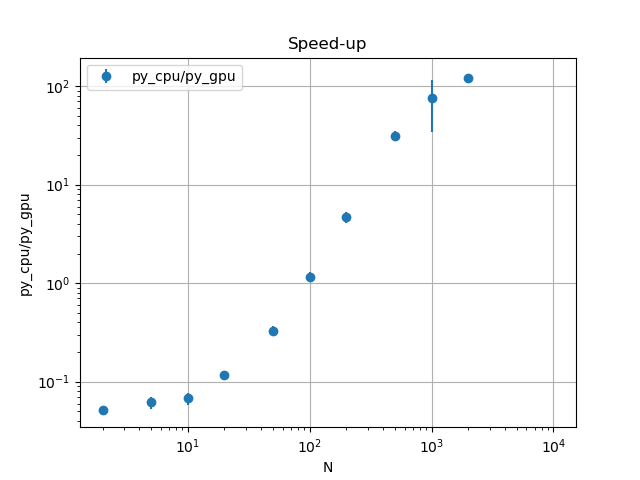

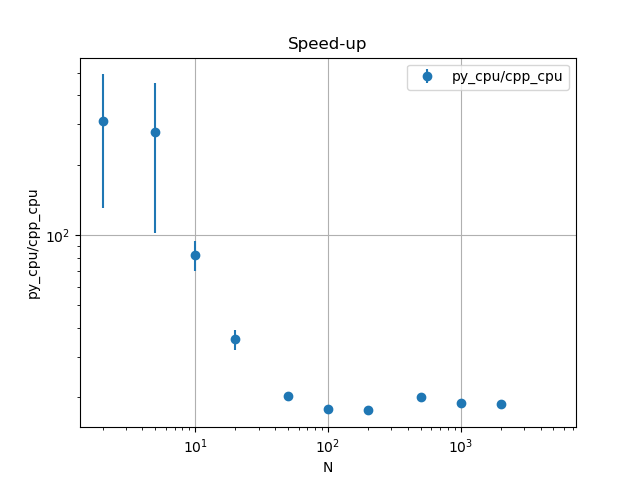

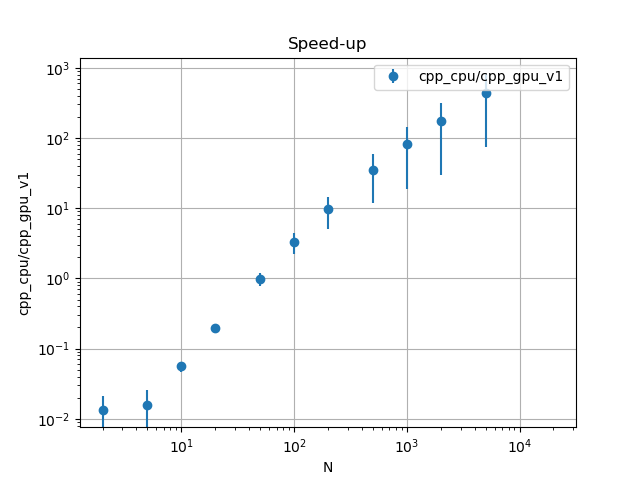

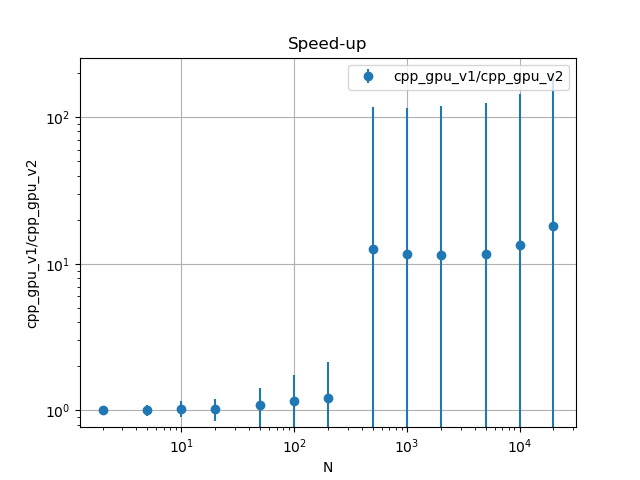

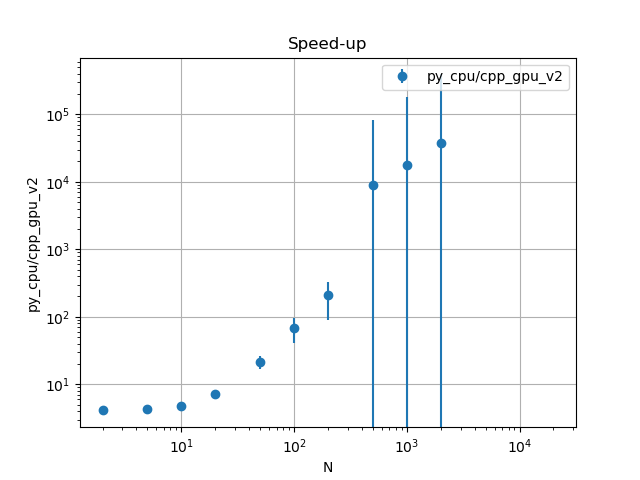

In [ ]:
#Grafico cociente entre tiempos de computo


# .py_gpu respecto a py_cpu
graph_speedup(0, 1)

# .cpp_cpu respecto a py_cpu
graph_speedup(0, 2)

# .cpp_gpu_v1 respecto a cpp_cpu
graph_speedup(2, 3)

# .cpp_gpu_v1 respecto a cpp_gpu_v2
graph_speedup(3, 4)

# .cpp_gpu_v2 respecto a py_cpu
graph_speedup(0, 4)

In [ ]:
def profiling(procesos, titulo):

    fig, ax = plt.subplots(figsize=(10, 5))

    # Crear el diagrama de Gantt
    colores = ['tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:orange']
    for i, (proceso, inicio, fin) in enumerate(procesos):
        ax.broken_barh([(inicio, fin - inicio)], (i - 0.4, 0.8), facecolors=colores[i%len(colores)])

    # Configurar el gráfico
    ax.set_xlabel('tiempo [%]')
    ax.set_yticks(range(len(procesos)))
    ax.set_yticklabels([proceso for proceso, inicio, fin in procesos])
    ax.tick_params(axis='y', which='major')
    ax.grid(True)
    ax.set_title(titulo)
    #Disminuir el tamaño de los márgenes superior y derecho
    plt.subplots_adjust(top=0.99, right=0.99)

    #Guardo el gráfico en la carpeta gráficos con su titulo
    plt.savefig("graficos/" + titulo + ".png", dpi=300)
    
    plt.show()

    return



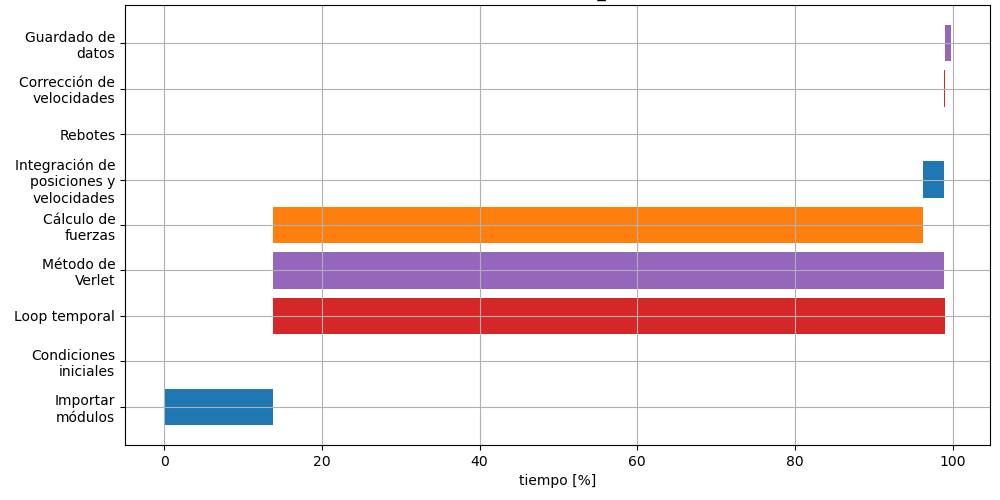

In [ ]:
titulo = "Profiling de py_cpu"

# Definir los procesos y subprocesos con su duración
procesos = [
    ("Importar\nmódulos", 0, 13.83),
    ("Condiciones\niniciales", 13.83, 13.83), # Duración 0, por lo que el inicio y fin son iguales
    ("Loop temporal", 13.83, 13.83 + 85.15),
    ("Método de\nVerlet", 13.83, 13.83 + 85.10),
    ("Cálculo de\nfuerzas", 13.83, 13.83 + 82.38),
    ("Integración de\nposiciones y\nvelocidades", 13.83 + 82.38, 13.83 + 85.10),
    ("Rebotes", 13.83 + 85.10, 13.83 + 85.10 + 0.025),
    ("Corrección de\nvelocidades", 13.83 + 85.10 + 0.025, 13.83 + 85.10 + 0.025 + 0.025),
    ("Guardado de\ndatos", 13.83 + 85.15, 13.83 + 85.15 + 0.77),
]


profiling(procesos, titulo)

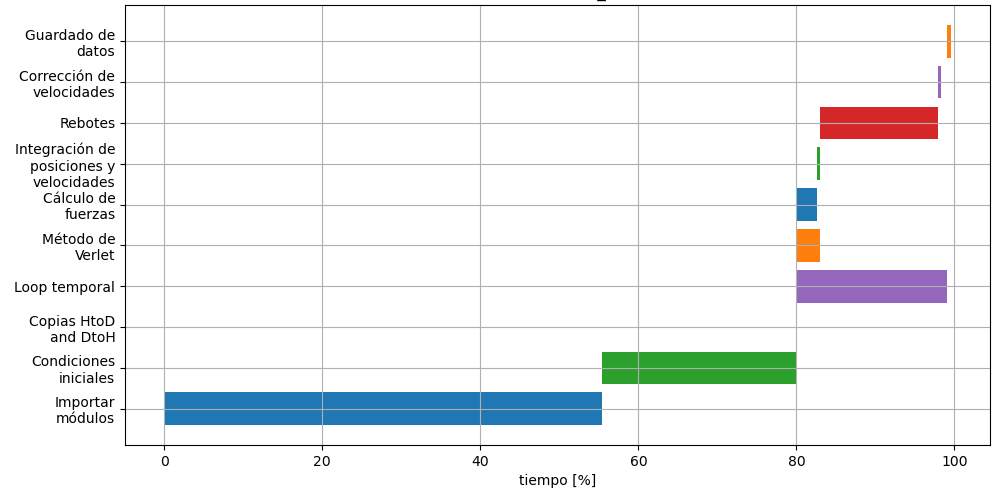

In [ ]:
titulo = "Profiling de py_gpu"

# Definir los procesos y subprocesos con su duración
procesos = [
    ("Importar\nmódulos", 0, 55.45),
    ("Condiciones\niniciales", 55.45, 55.45 + 24.68),
    ("Copias HtoD\nand DtoH", 55.45 + 24.68, 55.45 + 24.68),
    ("Loop temporal", 55.45 + 24.68, 55.45 + 24.68 + 18.87),
    ("Método de\nVerlet", 55.45 + 24.68, 55.45 + 24.68 + 2.89),
    ("Cálculo de\nfuerzas", 55.45 + 24.68, 55.45 + 24.68 + 2.47),
    ("Integración de\nposiciones y\nvelocidades", 55.45 + 24.68 + 2.47, 55.45 + 24.68 + 2.89),
    ("Rebotes", 55.45 + 24.68 + 2.89, 55.45 + 24.68 + 2.89 + 14.84),
    ("Corrección de\nvelocidades", 55.45 + 24.68 + 2.89 + 14.84, 55.45 + 24.68 + 2.89 + 14.84 + 0.41),
    ("Guardado de\ndatos", 55.45 + 24.68 + 18.87, 55.45 + 24.68 + 18.87 + 0.52),
]




profiling(procesos, titulo)

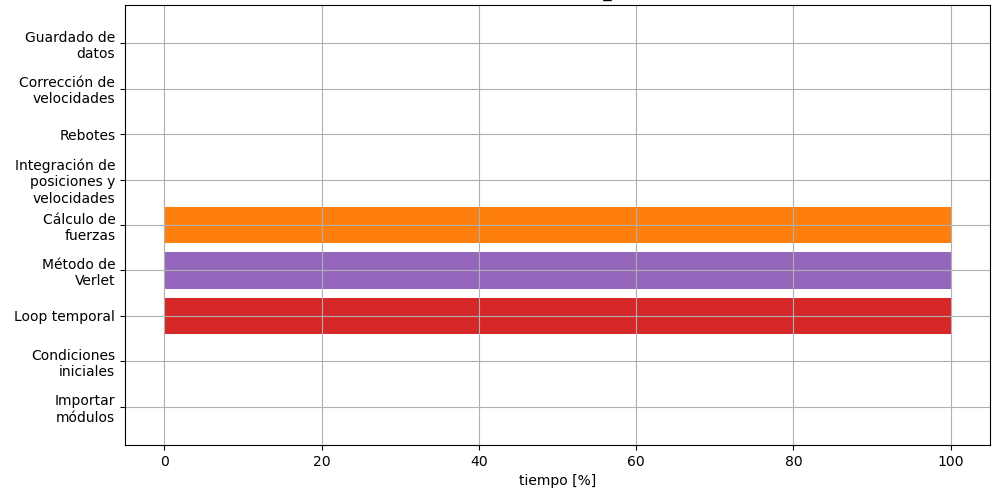

In [ ]:
titulo = "Profiling de cpp_cpu"
procesos = [
    ("Importar\nmódulos", 0, 0),
    ("Condiciones\niniciales", 0, 0),
    ("Loop temporal", 0, 100),
    ("Método de\nVerlet", 0, 100),
    ("Cálculo de\nfuerzas", 0, 100),
    ("Integración de\nposiciones y\nvelocidades", 0, 0),
    ("Rebotes", 0, 0),
    ("Corrección de\nvelocidades", 0, 0),
    ("Guardado de\ndatos", 0, 0),
]
profiling(procesos, titulo)


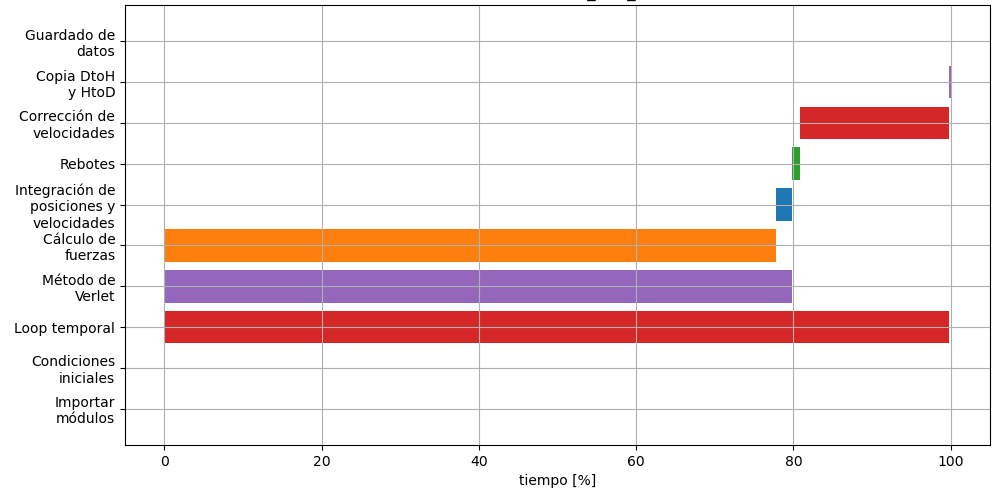

In [ ]:
titulo = "Profiling de cpp_gpu_v1"

procesos = [
    ("Importar\nmódulos", 0, 0),
    ("Condiciones\niniciales", 0, 0),
    ("Loop temporal", 0, 100 - 0.14 - 0.13),
    ("Método de\nVerlet", 0, 100 - 18.94 - 1.03 - 0.14 - 0.13),
    ("Cálculo de\nfuerzas", 0, 77.73),
    ("Integración de\nposiciones y\nvelocidades", 77.73, 77.73 + 1.06 + 0.99),
    ("Rebotes", 77.73 + 1.06 + 0.99, 77.73 + 1.06 + 0.99 + 1.03),
    ("Corrección de\nvelocidades", 77.73 + 1.06 + 0.99 + 1.03, 77.73 + 1.06 + 0.99 + 1.03 + 18.94),
    ("Copia DtoH\ny HtoD", 100 - 0.14 - 0.13, 100 - 0.14 - 0.13 + 0.14 + 0.13),
    ("Guardado de\ndatos", 100, 100),
]


profiling(procesos, titulo)

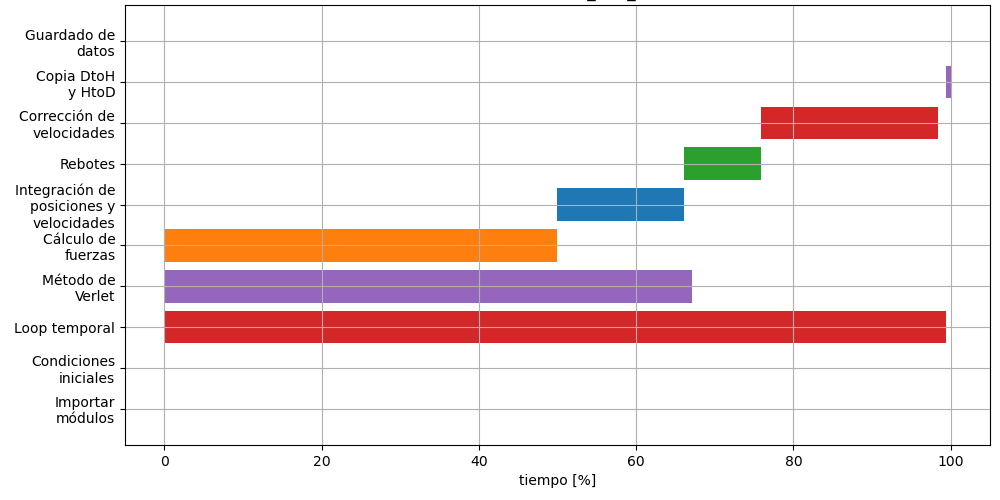

In [ ]:
titulo = "Profiling de cpp_gpu_v2"

procesos = [
    ("Importar\nmódulos", 0, 0),
    ("Condiciones\niniciales", 0, 0),
    ("Loop temporal", 0, 100 - 0.61),
    ("Método de\nVerlet", 0, 100 - 22.53 - 9.71 - 0.61),
    ("Cálculo de\nfuerzas", 0, 49.89),
    ("Integración de\nposiciones y\nvelocidades", 49.89, 49.89 + 8.75 + 7.51),
    ("Rebotes", 49.89 + 8.75 + 7.51, 49.89 + 8.75 + 7.51 + 9.71),
    ("Corrección de\nvelocidades", 49.89 + 8.75 + 7.51 + 9.71, 49.89 + 8.75 + 7.51 + 9.71 + 22.53),
    ("Copia DtoH\ny HtoD", 100 - 0.61, 100),
    ("Guardado de\ndatos", 100, 100),
]


profiling(procesos, titulo)